In [8]:
#=========================================================================
# load up the libraries
#=========================================================================
import pandas  as pd
import numpy   as np
import xgboost as xgb

#=========================================================================
# read in the data
#=========================================================================
df = pd.read_csv('../data/curated/clean_data.csv',index_col = 0)
def split_train_test(data, test_ratio):
    
 shuffled_indicies = np.random.permutation(len(data))
 test_data_size = int(len(data) * test_ratio)
 test_indicies = shuffled_indicies[:test_data_size]
 train_indicies = shuffled_indicies[test_data_size:]
 return data.iloc[train_indicies], data.iloc[test_indicies]

train_data, test_data = split_train_test(df, 0.2)


In [9]:
train_data

,level_0,name,years,property_type,coordinates,postcode,sa2_coor,closest_sa2,bed,bath,car,Income,Population,week_rent,real_school_distance,real_school_duration,real_station_distance,real_station_duration,Hospital num
8010,8010,"4 ANDERSON STREET, LILYDALE",2019,Category : House,"(1868 -37.760889\nName: latitude, dtype: flo...",3140,[xcoord 145.358123\nycoord -37.753542\nN...,Lilydale - Coldstream,3.0,1.0,5.0,63196.933333,19891.000000,400.0,1.2,2.0,1.8,3.6,1.0
14346,14346,"6 MEADOWS ROAD, ALBERTON",2020,Category : House,"(4478 -38.603241\nName: latitude, dtype: flo...",3971,[xcoord 146.021481\nycoord -38.448392\nN...,Yarram,3.0,2.0,0.0,62531.476190,5538.000000,285.0,1.8,1.9,158.4,120.0,1.0
3360,3360,"14 LUCAS TERRACE, TAYLORS HILL",2018,Category : House,"(461 -37.719389\nName: latitude, dtype: floa...",3037,[xcoord 144.763577\nycoord -37.700754\nN...,Taylors Hill,4.0,2.0,2.0,62144.552381,20439.000000,450.0,1.5,4.8,5.0,10.3,0.0
3789,3789,"1A FERGUSON ST, MACLEOD",2018,Category : House,"(995 -37.733164\nName: latitude, dtype: floa...",3085,[xcoord 145.085446\nycoord -37.729088\nN...,Viewbank - Yallambie,3.0,1.0,1.0,67043.714286,19205.000000,400.0,0.5,1.6,1.0,1.8,0.0
6092,6092,"7 LAMBERT STREET, TONGALA",2018,Category : House,"(3727 -36.246604\nName: latitude, dtype: flo...",3621,[xcoord 145.027278\nycoord -36.297125\nN...,Kyabram,3.0,1.0,2.0,47778.952381,11045.000000,325.0,339.1,273.6,196.3,152.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,25930,14 Newcombe Court Wantirna South VIC 3152,2022,House,"[-37.8878784, 145.2270212]",3152,[xcoord 145.229741\nycoord -37.852904\nN...,Wantirna South,4.0,2.0,2.0,66773.771429,19285.983612,650.0,0.8,2.2,7.6,13.4,2.0
11604,11604,"9 JASPER PLACE, DONVALE",2020,Category : House,"(1467 -37.79846\nName: latitude, dtype: floa...",3111,[xcoord 145.195610\nycoord -37.788421\nN...,Donvale - Park Orchards,4.0,3.0,2.0,83523.047619,16642.000000,800.0,1.1,2.8,2.9,5.1,1.0
10844,10844,"28A HALDANE ROAD, NIDDRIE",2020,Category : Townhouse,"(621 -37.734855\nName: latitude, dtype: floa...",3042,[xcoord 144.882322\nycoord -37.724540\nN...,Niddrie - Essendon West,3.0,2.0,2.0,78098.904762,7635.000000,450.0,1.0,3.0,4.3,7.0,0.0
4749,4749,"8/85 BUCKLEY ST, NOBLE PARK",2018,Category : Unit/apmt,"(2175 -37.971679\nName: latitude, dtype: flo...",3174,[xcoord 145.180645\nycoord -37.962710\nN...,Noble Park - West,1.0,1.0,0.0,45179.857143,20015.000000,250.0,0.1,0.4,0.9,1.7,3.0


In [12]:
train_data = train_data.drop(['level_0', 'name', 'property_type', 'coordinates','sa2_coor', 'closest_sa2'], axis = 1)
train_data

,years,postcode,bed,bath,car,Income,Population,week_rent,real_school_distance,real_school_duration,real_station_distance,real_station_duration,Hospital num
8010,2019,3140,3.0,1.0,5.0,63196.933333,19891.000000,400.0,1.2,2.0,1.8,3.6,1.0
14346,2020,3971,3.0,2.0,0.0,62531.476190,5538.000000,285.0,1.8,1.9,158.4,120.0,1.0
3360,2018,3037,4.0,2.0,2.0,62144.552381,20439.000000,450.0,1.5,4.8,5.0,10.3,0.0
3789,2018,3085,3.0,1.0,1.0,67043.714286,19205.000000,400.0,0.5,1.6,1.0,1.8,0.0
6092,2018,3621,3.0,1.0,2.0,47778.952381,11045.000000,325.0,339.1,273.6,196.3,152.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,2022,3152,4.0,2.0,2.0,66773.771429,19285.983612,650.0,0.8,2.2,7.6,13.4,2.0
11604,2020,3111,4.0,3.0,2.0,83523.047619,16642.000000,800.0,1.1,2.8,2.9,5.1,1.0
10844,2020,3042,3.0,2.0,2.0,78098.904762,7635.000000,450.0,1.0,3.0,4.3,7.0,0.0
4749,2018,3174,1.0,1.0,0.0,45179.857143,20015.000000,250.0,0.1,0.4,0.9,1.7,3.0


In [13]:
X_train = train_data.select_dtypes(include=['number']).copy()
X_train = X_train.drop(['week_rent'], axis=1)
y_train = train_data["week_rent"]
X_test  = test_data.select_dtypes(include=['number']).copy()

In [14]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: Future

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [17]:
X_train

,years,postcode,bed,bath,car,Income,Population,real_school_distance,real_school_duration,real_station_distance,real_station_duration,Hospital num
8010,2019,3140,3.0,1.0,5.0,63196.933333,19891.000000,1.2,2.0,1.8,3.6,1.0
14346,2020,3971,3.0,2.0,0.0,62531.476190,5538.000000,1.8,1.9,158.4,120.0,1.0
3360,2018,3037,4.0,2.0,2.0,62144.552381,20439.000000,1.5,4.8,5.0,10.3,0.0
3789,2018,3085,3.0,1.0,1.0,67043.714286,19205.000000,0.5,1.6,1.0,1.8,0.0
6092,2018,3621,3.0,1.0,2.0,47778.952381,11045.000000,339.1,273.6,196.3,152.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25930,2022,3152,4.0,2.0,2.0,66773.771429,19285.983612,0.8,2.2,7.6,13.4,2.0
11604,2020,3111,4.0,3.0,2.0,83523.047619,16642.000000,1.1,2.8,2.9,5.1,1.0
10844,2020,3042,3.0,2.0,2.0,78098.904762,7635.000000,1.0,3.0,4.3,7.0,0.0
4749,2018,3174,1.0,1.0,0.0,45179.857143,20015.000000,0.1,0.4,0.9,1.7,3.0


In [20]:
X_test = X_test.drop(['level_0','week_rent'], axis = 1)

In [21]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
predictions = regressor.predict(X_test)

/home/alphaqiao/miniconda3/envs/ads/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [23]:
predictions

array([433.35287, 470.67703, 473.78665, ..., 442.583  , 343.343  ,
       347.85355], dtype=float32)

In [24]:
y_true

4151     405.0
11831    450.0
27197    525.0
12963    500.0
19420    330.0
         ...  
7929     490.0
8823     495.0
25015    400.0
7159     275.0
7095     350.0
Name: week_rent, Length: 5662, dtype: float64

In [31]:
import sklearn.metrics as metrics
y_true     = test_data["week_rent"]

from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_true, predictions) )
print("The score is %.5f" % RMSLE )

The score is -0.05132


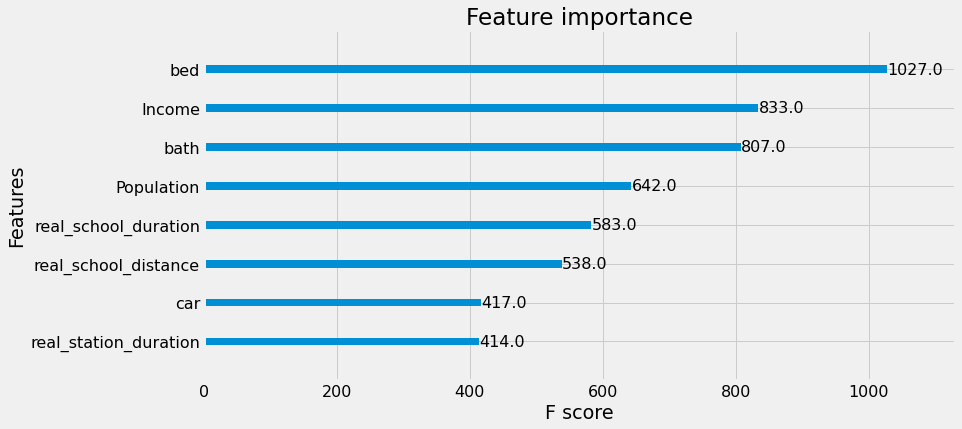

In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=8, ax=ax)
plt.show()

In [33]:
future_df = pd.read_csv('../data/curated/2023_2025_house_data_final(1).csv',index_col = 0)
X = future_df.drop(['name', 'property_type', 'coordinates','sa2_coor', 'closest_sa2','week_rent'], axis = 1)

In [34]:
predictions = regressor.predict(X)

In [35]:
future_df['week_rent'] = predictions

In [39]:
future_df['week_rent'].describe()

count    31974.000000
mean       511.327789
std        683.699890
min      -2420.772217
25%        409.320923
50%        464.617065
75%        549.164429
max      50501.796875
Name: week_rent, dtype: float64

In [37]:
future_df.to_csv('../data/curated/XGBoost prediction.csv')